# Exploration des données Ford Gobike

## Dispute préliminaire

Ce document explore un ensemble de données contenant les données de trajetfordgo bike.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

Afficher les 5 premier ligne du fichier :

In [2]:
df = pd.read_csv('../input/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Affichage de certaine information sur le fichier csv :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


Changer le type de données de start_time et end_time en datetime : 

In [6]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(7), int64(2), object(4)
me

Génère un résumé statistique des données :

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000



### Quelle est la structure de votre jeu de données ?
Il y a 183412 trajets fordgobike dans le jeu de données avec 16 spécifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Sur 16 spécifications, 9 sont numériques, 2 datetime, 4 sont de type objet et 1 est de type booléen.

### Quelle(s) est/sont la/les principale(s) caractéristique(s) d'intérêt dans votre jeu de données ?
Je suis très intéressé à comprendre comment la durée du voyage dépend d'autres spécifications de l'ensemble de données.

### À votre avis, quelles fonctionnalités de l'ensemble de données vous aideront à étayer votre enquête sur les fonctionnalités qui vous intéressent ?
Je m'attends à ce que la durée du trajet dépende fortement des gares de départ et des gares d'arrivée, les endroits les plus fréquentés devraient recevoir plus de trajets, de sorte que certaines gares devraient enregistrer plus de secondes de durée. Je pense également que le type d'utilisateur, l'année de naissance et le sexe devraient également affecter la durée du voyage.


## Exploration univariée
Je vais commencer par regarder la distribution de la principale variable d'intérêt : duration_sec.

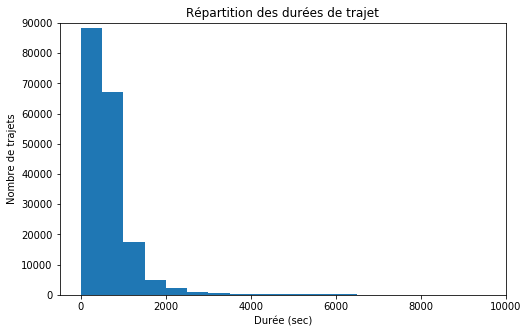

In [11]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Répartition des durées de trajet')
plt.xlabel('Durée (sec)')
plt.ylabel('Nombre de trajets')
plt.axis([-500, 10000, 0, 90000])
plt.show()

Il y a une longue queue dans la distribution, alors mettons-la à l'échelle logarithmique.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1717: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  self.set_xlim([v[0], v[1]], emit=emit, auto=False)


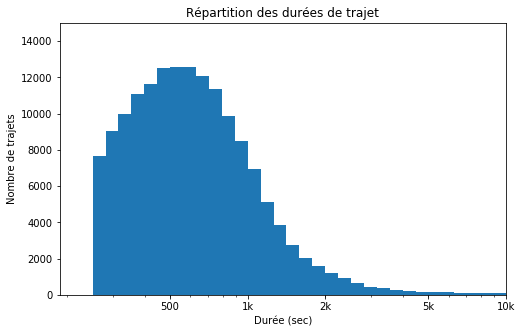

In [13]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Répartition des durées de trajet')
plt.xlabel('Durée (sec)')
plt.ylabel('Nombre de trajets')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

La durée du voyage est principalement concentrée sur le spectre inférieur. La plupart des valeurs sont inférieures à 2000 secondes avec un pic autour de 600 secondes. Les valeurs de durée de voyage augmentent d'abord à partir d'environ 8000 valeurs à 0 jusqu'à 12500 valeurs à environ 600, mais commencent ensuite à chuter et à descendre en dessous de 2000 valeurs en moins de 2000 sec.

Examinons maintenant d'autres facteurs tels que l'identifiant de la station de début et de fin et l'année de naissance

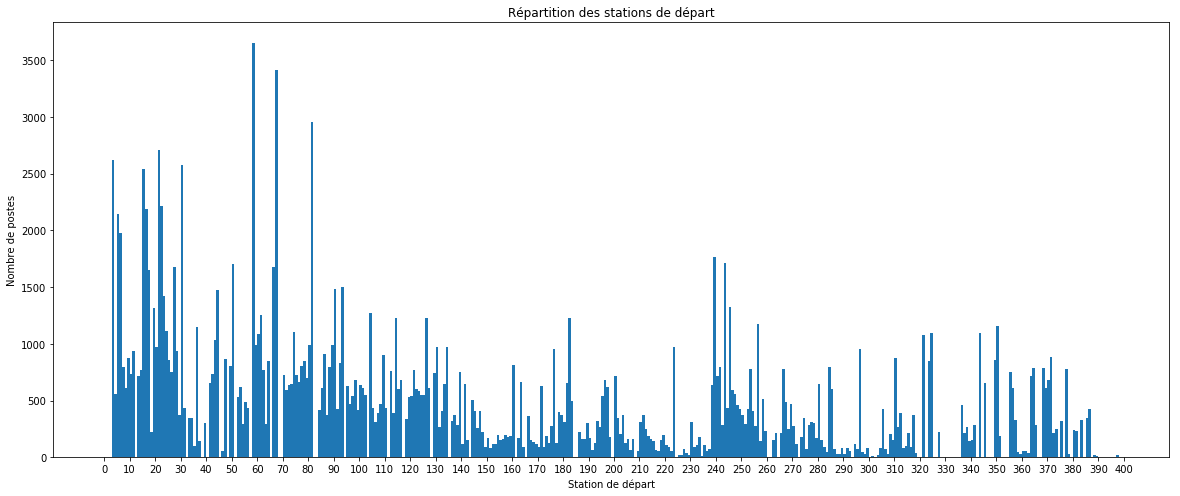

In [14]:
binsize = 1
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Répartition des stations de départ')
plt.xlabel('Station de départ')
plt.ylabel('Nombre de postes')
plt.show()

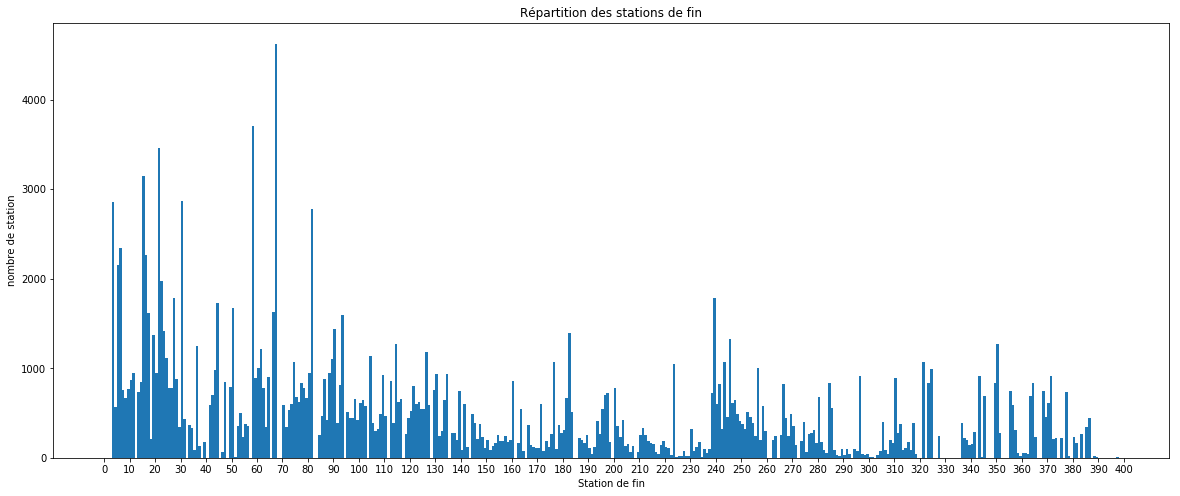

In [15]:
binsize = 1
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Répartition des stations de fin')
plt.xlabel('Station de fin')
plt.ylabel('nombre de station')
plt.show()

Nous pouvons voir que les mêmes stations sont plus fréquentes que les stations de départ et les stations de fin.

Tracer la répartition par âge dérivée de l'année de naissance du membre.

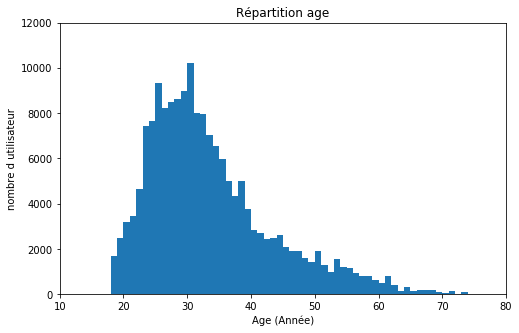

In [16]:
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Répartition age')
plt.xlabel('Age (Année)')
plt.ylabel('nombre d utilisateur')
plt.show()

On constate que la distribution est plus concentrée entre 20 et 40 ans.

Tracer les types d'utilisateurs sur la barre

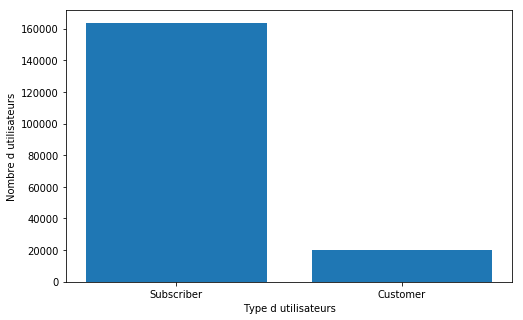

In [18]:
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('Type d utilisateurs')
plt.ylabel('Nombre d utilisateurs')
plt.show()

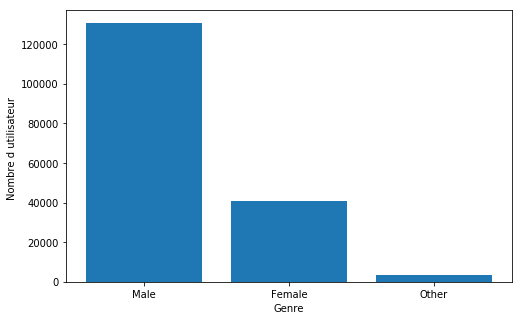

In [19]:
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Genre')
plt.ylabel('Nombre d utilisateur ')
plt.show()

### Discutez de la ou des distributions de vos variables d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?
La durée du voyage prend une grande quantité de valeurs et est concentrée sur une queue, donc je l'ai regardée dans la transformation du journal et j'ai trouvé que le pic se produit à 600 secondes à partir de 0, puis la distribution commence à baisser et ne retrouve plus de valeur de pointe.

### Parmi les fonctionnalités que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données ? Si oui, pourquoi avez-vous fait cela ?
L'année de naissance est convertie en soustrayant l'année de l'année en cours, ce qui nous donne une distribution pour l'âge, cette action est effectuée car l'âge donne une meilleure perception de la dépendance à la durée du voyage. De plus, la station de départ et la station d'arrivée sont tracées dans un tracé plus grand car cela donne un meilleur aperçu de la circulation des vélos à certaines stations.


## Exploration bivariée

Voyons d'abord la corrélation entre la durée du voyage et l'âge.

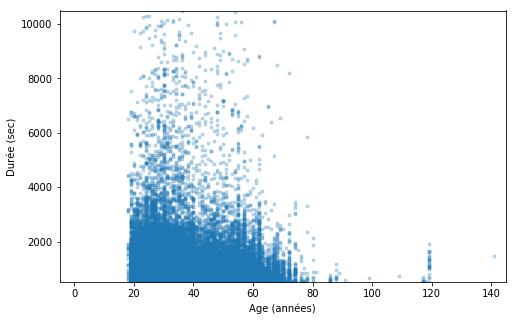

In [20]:
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (années)')
plt.ylabel('Durée (sec)')
plt.show()

Comme la plupart des durées sont inférieures à 6000 et que l'âge est inférieur à 80, recadrons l'intrigue jusqu'à ces valeurs.

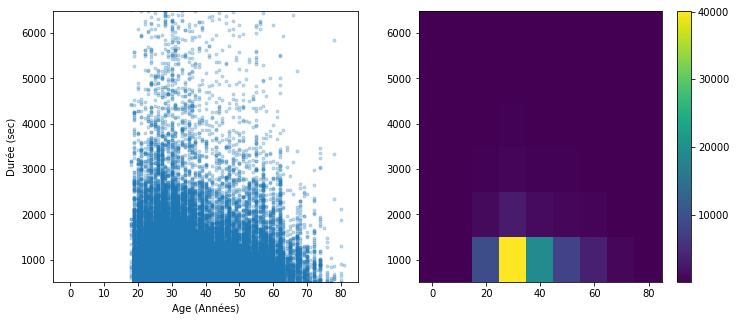

In [21]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.xlabel('Age (Années)')
plt.ylabel('Durée (sec)')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

En examinant ces olys, nous pouvons dire que les utilisateurs les plus fréquents de vélos ont entre 20 et 45 ans. La durée la plus élevée est enregistrée par les membres les plus jeunes.

Examinons maintenant la dépendance de la durée à la station de départ et à la station de fin.

In [22]:
sorted(df.start_station_id.unique())

[3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 27.0,
 28.0,
 30.0,
 31.0,
 33.0,
 34.0,
 36.0,
 37.0,
 39.0,
 43.0,
 44.0,
 46.0,
 47.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 55.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 66.0,
 67.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 101.0,
 102.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 125.0,
 126.0,
 127.0,
 129.0,
 130.0,
 131.0,
 133.0,
 134.0,
 136.0,
 137.0,
 139.0,
 140.0,
 141.0,
 144.0,
 148.0,
 149.0,
 150.0,
 151.0,
 154.0,
 155.0,
 156.0,
 158.0,
 159.0,
 160.0,
 163.0,
 166.0,
 171.0,
 172.0,
 174.0,
 176.0,
 180.0,
 181.0,
 182.0,
 183.0,
 186.0,
 190.0,
 193.0,
 194.0,
 195.0,
 196.0,
 197.0,
 198.0,
 202.0,
 207.0

In [25]:
t = []

all_start_station_ids = sorted(df.start_station_id.unique())
for x in all_start_station_ids :
    t.append(df[df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


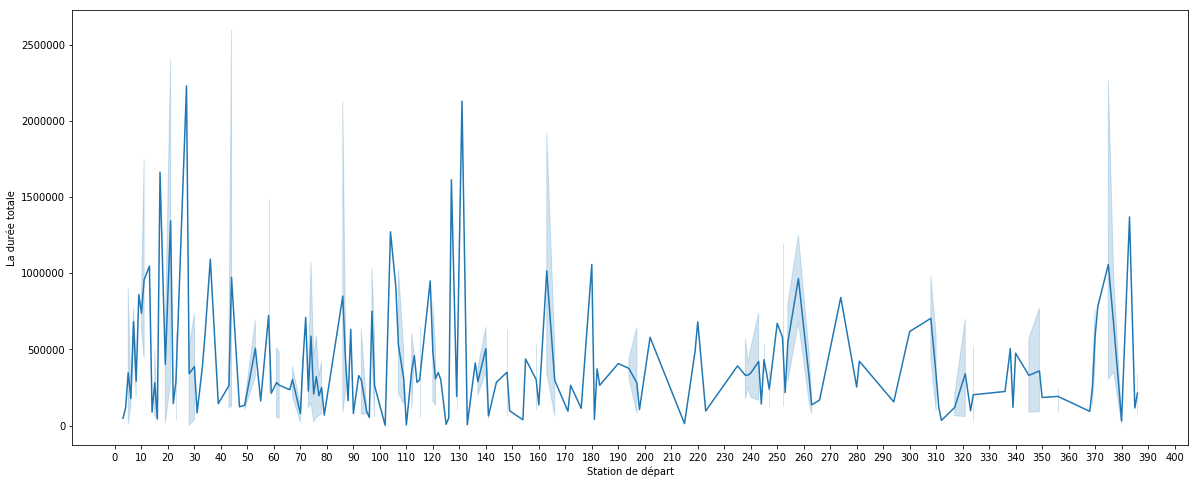

In [26]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('Station de départ')
plt.ylabel('La durée totale')
plt.show()

In [27]:
t = []

all_end_station_ids = sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    t.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


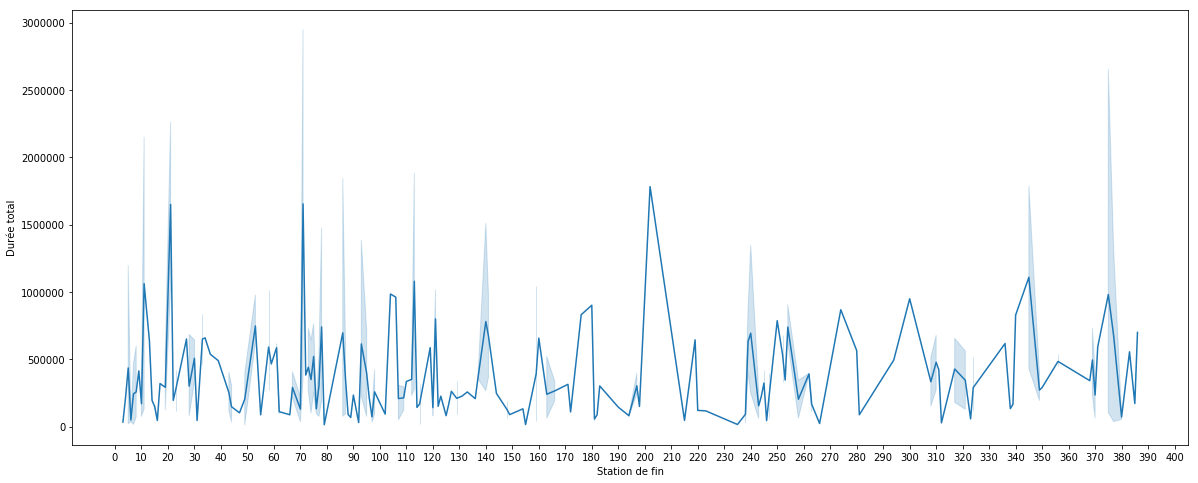

In [28]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('Station de fin')
plt.ylabel('Durée total')
plt.show()

En regardant ces tracés, vous pouvez voir que la durée du trajet pour certaines stations en tant que station de départ est plus élevée et pour certaines stations en tant que station d'arrivée est plus élevée. Par cela, nous pouvons voir quelles gares entraînent le démarrage de trajets plus longs et quelles gares se terminent par des trajets plus longs.

Examinons maintenant la dépendance des durées de voyage sur le sexe et le type de membre.

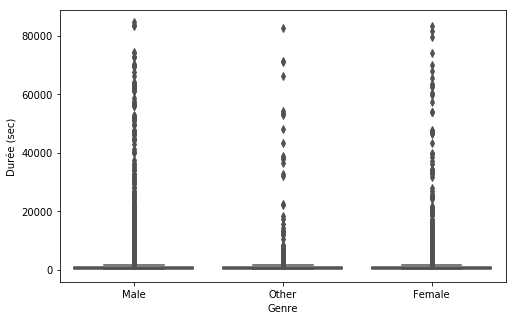

In [29]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Genre')
plt.ylabel('Durée (sec)')
plt.show()

Comme nous pouvons le voir, les valeurs sont très répandues pour voir une boîte à moustaches, alors réduisons la durée à 2000 secondes maximum pour obtenir une image plus claire.

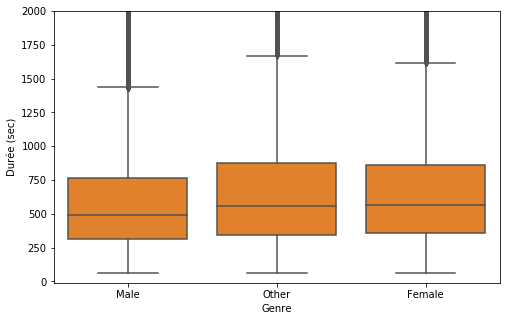

In [30]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Genre')
plt.ylabel('Durée (sec)')
plt.show()

Bien que le nombre d'hommes soit très élevé, les autres et les femmes, mais nous pouvons voir qu'un pourcentage plus élevé de femmes et d'autres parcourent des trajets plus longs que les hommes.

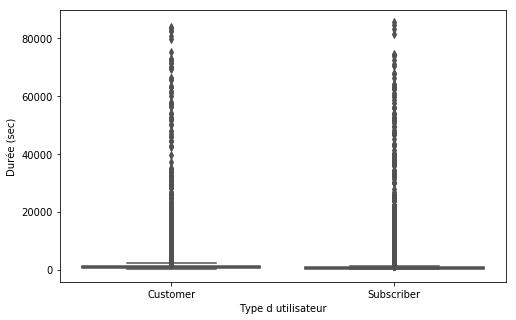

In [31]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('Type d utilisateur')
plt.ylabel('Durée (sec)')
plt.show()

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2500 sec to get clearer picture.

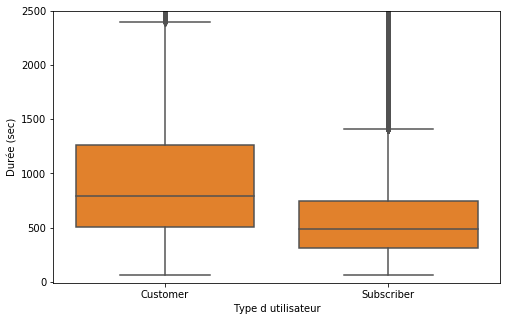

In [32]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('Type d utilisateur')
plt.ylabel('Durée (sec)')
plt.show()

Ici, nous pouvons voir qu'un pourcentage plus élevé de clients effectuent des trajets plus longs que les abonnés.

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques d'intérêt ont-elles varié avec d'autres caractéristiques de l'ensemble de données ?
La durée du voyage dépend beaucoup de l'âge du membre, je ne m'attendais pas à beaucoup de dépendance. Par contre, la gare de départ et la gare d'arrivée ne déterminent pas beaucoup la durée du trajet. Cela suggère seulement que certaines gares de départ ont des durées de trajet plus élevées comme point de départ et que certaines gares d'arrivée ont des durées de trajet plus élevées comme point d'arrivée.

### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les principales caractéristiques d'intérêt) ?
Je m'attendais à ce que les variables catégorielles comme le type d'utilisateur et les valeurs de sexe aient une valeur plus élevée pour avoir une durée de voyage plus longue, mais c'est l'inverse comme pour le sexe, la valeur des membres masculins est très élevée mais le pourcentage de membres féminins pour faire des voyages plus longs est plus haut.

## Exploration multivariée

La principale chose que je souhaite explorer dans cette partie de l'analyse est la manière dont les deux mesures catégorielles, le sexe et le type d'utilisateur, jouent un rôle dans la relation entre la durée du voyage et l'âge.

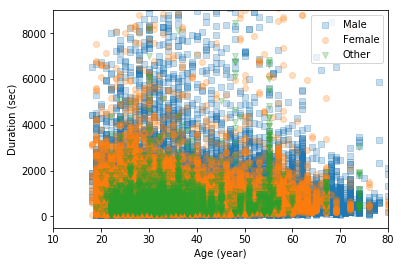

In [34]:
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

Ce graphique ne montre pas une image claire, séparons les trois sexes dans des graphiques différents.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


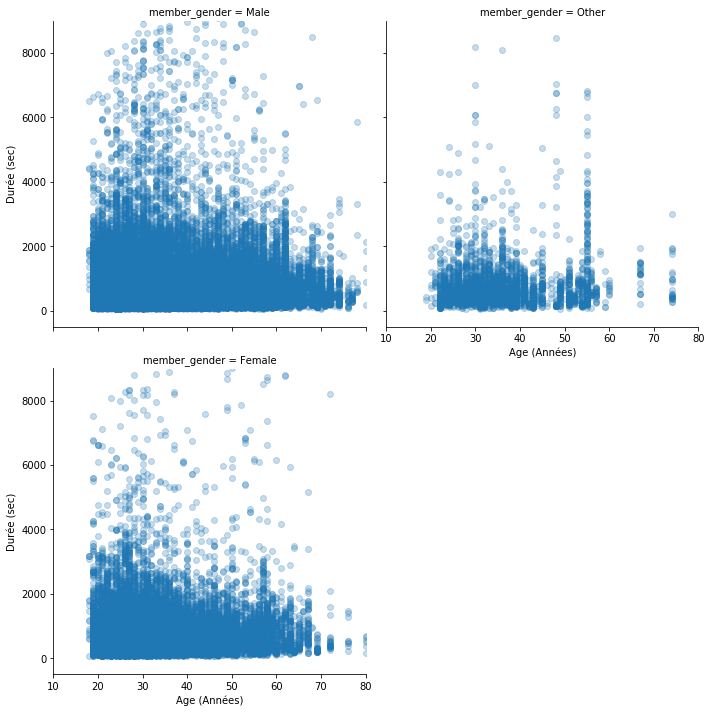

In [35]:
df['age'] = (2019 - df['member_birth_year'])
genders = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (Années)')
genders.set_ylabels('Durée (sec)')

plt.show()

On assiste ici à un saut de durée pour d'autres à un âge plus avancé (autour de 60 ans).

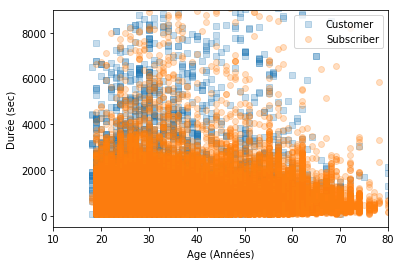

In [36]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]

for utype, marker in user_type_markers:
    df_utype = df[df['user_type'] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (Années)')
plt.ylabel('Durée (sec)')
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


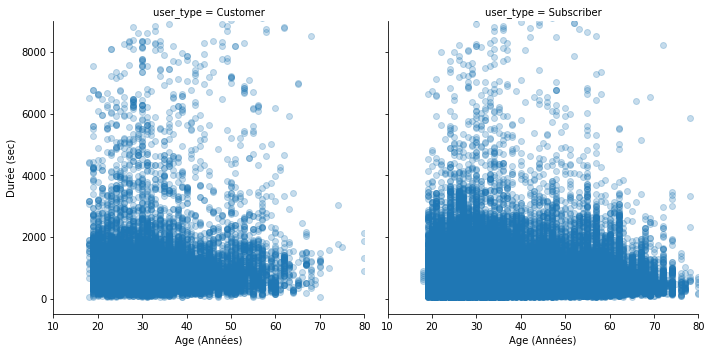

In [37]:
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Age (Années)')
user_types.set_ylabels('Durée (sec)')

plt.show()

Dans ce cas, le client et l'abonné affichent des tendances similaires pour l'âge et la durée du voyage. Mais il y a une légère inclinaison vers un âge plus élevé pour les abonnés.